# Forward Kinematics for Differential Drive Robotics Platform

## Problem Setup

We know the angular speed of each wheel and we want to know the position and orientation of the robot after time t expressed in the coordinate system of $ t_0 $ where the robot is oriente in the x axis

**The setup is as follows:**

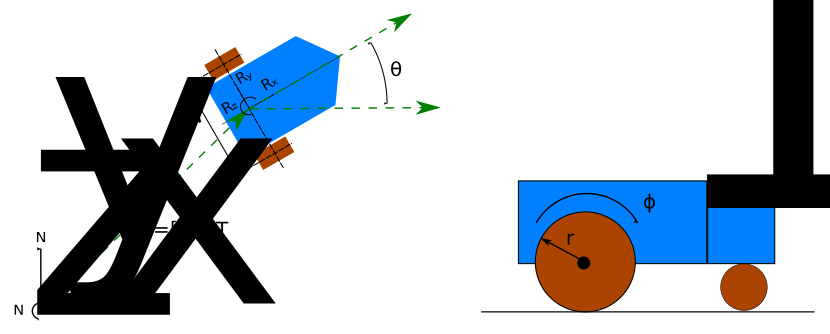

In [1]:
from IPython.display import SVG
SVG(filename='Robot.svg')

At time $ t_0 $ the position vector $\vec{p}$ is:

$$
\vec{p_0} = [\matrix{x_0 && y_0 && 0}]^T
$$

and we want to know:

$$
\vec{p_1} = [\matrix{x_1 && y_1 && \theta_1}]^T
$$

Given the angular velocities of the left and right wheel $ \phi_l $ and $ \phi_r $.

If both wheels rotate at the same speed and the same direction to robot will move in a straight line. Only when the wheels rotate in at a different speed the robot will change direction.

We will first determine the distance traveled when the wheel is rotated by $\varphi$. When then look how the difference on wheel speed will rotate the robot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

Text(-0.04, -0.24, 'V = $r\\dot{\\varphi}$')

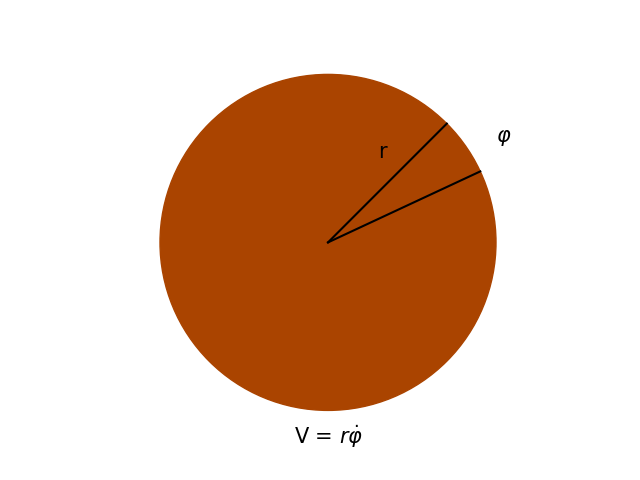

In [3]:
r = 0.2
wheel = plt.Circle((0, 0), r, color='#aa4400')
fig, ax = plt.subplots() 
ax.axis('equal')
ax.axis('off')
ax.add_patch(wheel)
plt.plot([0, r * np.cos(np.pi/180*45)], [0, r * np.sin((np.pi/180*45))], color = "black")
plt.plot([0, r * np.cos(np.pi/180*25)], [0, r * np.sin((np.pi/180*25))], color = "black")
plt.xlim([-0.3,0.3])
plt.text(0.06, 0.1, "r", fontsize=15)
plt.text(0.2, 0.12, r"$\varphi$", fontsize=15)
plt.text(-0.04, -0.24, r"V = $r\dot{\varphi}$", fontsize=15)

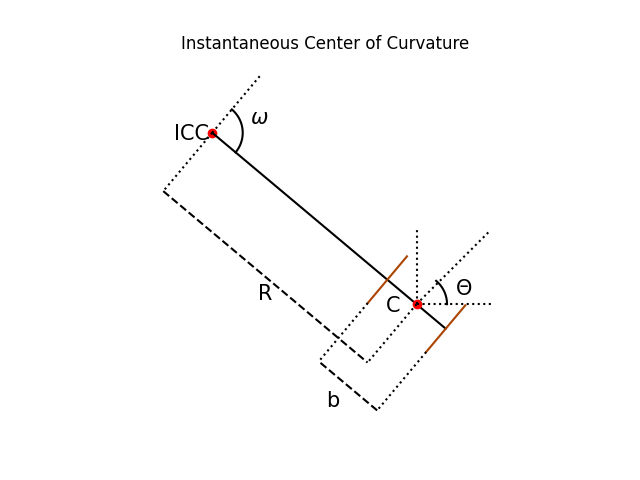

In [4]:
theta = 50
fig,ax = plt.subplots() 
ax.axis('equal')
ax.axis('off')
ax.plot([0.0], [0.0], 'ro')
ax.plot([0, 0.5*np.cos(np.deg2rad(theta))], [0, 0.5*np.sin(np.deg2rad(theta))], 'k:')
ax.set_title('Instantaneous Center of Curvature ')
ax.text(-0.25, -0.05, "ICC", fontsize=15)
w_r_x = 2*np.cos(np.deg2rad(theta - 90))
w_r_y = 2*np.sin(np.deg2rad(theta - 90))
w_l_x = 1.5*np.cos(np.deg2rad(theta - 90))
w_l_y = 1.5*np.sin(np.deg2rad(theta - 90))
c_x = 1.75*np.cos(np.deg2rad(theta - 90))
c_y = 1.75*np.sin(np.deg2rad(theta - 90))
ax.plot([0, w_r_x], [0, w_r_y], 'k')
w0_x = 0.2*np.cos(np.deg2rad(theta))
w0_y = 0.2*np.sin(np.deg2rad(theta))
b_x = 0.7*np.cos(np.deg2rad(theta))
b_y = 0.7*np.sin(np.deg2rad(theta))
ax.plot([w_r_x-w0_x, w_r_x+w0_x], [w_r_y-w0_y, w_r_y+w0_y], color='#aa4400')
ax.plot([w_l_x-w0_x, w_l_x+w0_x], [w_l_y-w0_y, w_l_y+w0_y], color='#aa4400')
ax.plot([w_r_x-w0_x, w_r_x-b_x], [w_r_y-w0_y, w_r_y-b_y], 'k:')
ax.plot([w_l_x-w0_x, w_l_x-b_x], [w_l_y-w0_y, w_l_y-b_y], 'k:')
ax.plot([w_r_x-b_x, w_l_x-b_x], [ w_r_y-b_y, w_l_y-b_y], 'k--')
ax.text(0.75, -1.8, "b", fontsize=15)
ax.plot([c_x], [c_y], 'ro')
ax.plot([c_x, c_x+0.5], [c_y, c_y], 'k:')
ax.plot([c_x, c_x], [c_y, c_y+0.5], 'k:')
ax.text(c_x-0.2, c_y-0.05, "C", fontsize=15)
R1_x = - 0.5*np.cos(np.deg2rad(theta))
R1_y = - 0.5*np.sin(np.deg2rad(theta))
R2_x = c_x - 0.5*np.cos(np.deg2rad(theta))
R2_y = c_y - 0.5*np.sin(np.deg2rad(theta))
ax.plot([0, R1_x], [0, R1_y], 'k:')
ax.plot([c_x, R2_x], [c_y, R2_y], 'k:')
ax.plot([R1_x, R2_x], [R1_y, R2_y], 'k--')
ax.text(0.3, -1.1, "R", fontsize=15)
arc_angles = np.linspace(np.deg2rad(theta - 90), np.deg2rad(theta), 20)
r = 0.2
arc_xs = r * np.cos(arc_angles)
arc_ys = r * np.sin(arc_angles)
plt.plot(arc_xs, arc_ys, 'k')
ax.text(0.25, 0.06,"$\omega$", fontsize=15)
arc_angles = np.linspace(np.deg2rad(0), np.deg2rad(theta), 20)
arc_xs = c_x + r * np.cos(arc_angles)
arc_ys = c_y + r * np.sin(arc_angles)
plt.plot(arc_xs, arc_ys, 'k')
ax.text(c_x+0.25, c_y+0.06,"$\Theta$", fontsize=15)
ax.plot([c_x, c_x + 0.5*np.cos(theta)], [c_y, c_y + 0.5*np.cos(theta)], 'k:')

Because the rate of rotation $\omega$ about the ICC must be the same for both wheels, we can write the following equations:

$$
\omega (R + b/2) = V_r
$$
$$
\omega (R - b/2) = V_l
$$

where w is the distance between the center C and the two wheels, $V_r$ , $V_l$ are the right and left wheel velocities along the ground , and R is the signed distance from the ICC to the center C. At any instance in time we can solve for R and $\omega$:

$$
R = \frac{b(V_l + V_r)}{2(V_r - V_l)}
$$

$$
\omega = \frac{(V_r - V_l)}{b}
$$


With $V_l = V_r$ R becomes infinite and $\omega$ becomes zero: The robot is moving in a straight line

With $V_l = -V_r$ R becomes zero: The robot is moving around the point C

With either $V_l = 0$ or $V_r = 0$ R becomes w: The robot is moving around the wheel that does not move.

## Forward Kinematic


Given $V_l$ and $V_r$ we can obtain the coordinated of ICC at the time $t_1$ in the coordinate system of the robot:
    
$$
ICC = [x - R\sin(\Theta), y + R\cos(\Theta)]
$$  

We calculate the pose at t = $\delta$t by translating ICC to the origing of the coordinate system at time t, rotating around the angular $\omega\delta$t and translating back to the ICC:

$$
\begin{bmatrix}x^{'} \\ y^{'} \\ \Theta^{'} \end{bmatrix} = \begin{pmatrix} cos(\omega\delta t) & -sin(\omega\delta t) & 0 \\ sin(\omega\delta t) & cos(\omega\delta t) & 0 \\ 0 & 0 & 1 \end{pmatrix} \begin{bmatrix} x - ICC_x \\ y - ICC_y \\ \Theta \end{bmatrix} + \begin{bmatrix} ICC_x \\ ICC_y \\ \omega\Delta t \end{bmatrix}
$$

## Inverse Kinematic

In general, we can describe the positon of a robot capable of moving in a particular direction $\Theta$(t) at a given velocity V(t) as:

$$
x(t) = \int_{0}^{t}V(t)cos(\Theta(t)dt
$$
$$
y(t) = \int_{0}^{t}V(t)sin(\Theta(t)dt
$$
$$
\Theta(t) = \int_{0}^{t}\omega(t)dt
$$

In the case of a differential drive $V(t) = v_l(t) + v_r(t)$ and $\omega(t) = v_r(t) - v_l(t)$

$$
x(t) = \int_{0}^{t}[v_l(t) + v_r(t)]cos(\Theta(t)dt
$$
$$
y(t) = \int_{0}^{t}[v_l(t) + v_r(t)]sin(\Theta(t)dt
$$
$$
\Theta(t) = \int_{0}^{t}[v_r(t) - v_l(t)]dt
$$

We can use Euler's method to integrate above equations

$$
x(t_0) = 0
$$
$$
y(t_0) = 0
$$
$$
\Theta(t_0) = 0
$$
$$
t_{n+1} = t_n + \Delta t
$$
$$
x(t_{n+1}) = x(t_n) + h(v_l(t_n) + v_r(t_n))cos(\Theta(t)
$$
$$
y(t_{n+1}) = y(t_n) + h(v_l(t_n) + v_r(t_n))sin(\Theta(t)
$$
$$
\Theta(t_{n+1}) =\Theta(t_n) + h(v_r(t) - v_l(t)
$$
where $h = t_{n+1} - t_n$

